In [1]:
import json
import struct
import numpy as np
import matplotlib.pyplot as plt
import photonforge as pf
import siepic_forge as siepic
import luxtelligence_lnoi400_forge as lxt
import tidy3d as td

td.config.logging_level = "ERROR"

# Set up technologies
siepic_tech = siepic.ebeam()
basic_tech = pf.basic_technology()
lxt_tech = lxt.lnoi400()
pf.config.default_technology = siepic_tech

# Initialize live viewer for real-time visualization
from photonforge.live_viewer import LiveViewer
viewer = LiveViewer()

# Define simulation parameters
wavelengths = np.linspace(1.53, 1.57, 101)
freqs = pf.C_0 / wavelengths

LiveViewer started at http://localhost:62471


In [2]:
dual_mode_spec = siepic_tech.ports["TE_1550_500"].copy()
dual_mode_spec.num_modes = 2  # Use both modes

siepic_tech.add_port("TE-TM_1550_500", dual_mode_spec)
siepic_tech.ports["TE-TM_1550_500"]

PortSpec(description="Strip TE 1550 nm, w=500 nm", width=2, limits=(-1, 1.22), num_modes=2, added_solver_modes=0, polarization="", target_neff=3.5, default_radius=0, path_profiles=[(0.5, 0, (1, 0))])

In [3]:
plasmonic_gold_gap = 0.03  # Gap between waveguide and gold
plasmonic_gold_thickness = 0.14  # Thickness of the gold layer
wg_height = 0.22

plasmonic_gold_layer = pf.LayerSpec(layer=(15, 0), description="Metal", color="FFE747", pattern="xx")

siepic_tech.add_layer("Plasmonic Gold Top", plasmonic_gold_layer)

plasmonic_gold_extrusion = pf.ExtrusionSpec(mask_spec=pf.MaskSpec((15, 0)), 
                                            medium={"optical": td.material_library['Au']['JohnsonChristy1972'], 
                                                    "electrical": td.LossyMetalMedium(conductivity=17.0, fit_param={'attrs': {}, 'max_num_poles': 16, 'tolerance_rms': 0.001, 'frequency_sampling_points': 20, 'log_sampling': True, 'type': 'SurfaceImpedanceFitterParam'}, frequency_range=(100000000.0, 200000000000.0))}, 
                                                    limits=(wg_height+plasmonic_gold_gap, wg_height+plasmonic_gold_gap+plasmonic_gold_thickness), sidewall_angle=0, reference="top")
siepic_tech.insert_extrusion_spec(4, plasmonic_gold_extrusion)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [4]:
plasmonic_gold_gap = 0.03  # Gap between waveguide and gold
plasmonic_gold_thickness = 0.14  # Thickness of the gold layer
wg_height = 0.22

plasmonic_gold_layer = pf.LayerSpec(layer=(16, 0), description="Metal", color="FFE747", pattern="xx")

siepic_tech.add_layer("Plasmonic Gold Side", plasmonic_gold_layer)

plasmonic_gold_extrusion = pf.ExtrusionSpec(mask_spec=pf.MaskSpec((16, 0)), 
                                            medium={"optical": td.material_library['Au']['JohnsonChristy1972'], 
                                                    "electrical": td.LossyMetalMedium(conductivity=17.0, fit_param={'attrs': {}, 'max_num_poles': 16, 'tolerance_rms': 0.001, 'frequency_sampling_points': 20, 'log_sampling': True, 'type': 'SurfaceImpedanceFitterParam'}, frequency_range=(100000000.0, 200000000000.0))}, 
                                                    limits=(wg_height/2, wg_height), sidewall_angle=0, reference="top")
siepic_tech.insert_extrusion_spec(5, plasmonic_gold_extrusion)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [5]:
@pf.parametric_component
def create_hybrid_rotator(*, gold_top_length=3.15, gold_top_width=0.25, gold_side_length=1.4, gold_side_width=0.14, gold_location="Left", gold_side=False, wg_length=10.0):

    wg_height = 0.22
    wg_width = 0.5

    # Create an empty component named "HybridRotator"
    hybrid_rotator = pf.Component("HybridRotator")

    waveguide = pf.Rectangle(size=(wg_length, wg_width))
    gold_plate = pf.Rectangle(size=(gold_top_length, gold_top_width), center=(0, (-1 if gold_location == "Right" else 1)*(wg_width/2 - gold_top_width/2)))

    # Add the geometry to the "Si" and "Plasmonic Gold" layers
    hybrid_rotator.add("Si", waveguide)
    hybrid_rotator.add("Plasmonic Gold Top", gold_plate)
    if gold_side:
        gold_side = pf.Rectangle(size=(gold_side_length, gold_side_width), center=(gold_top_length/2 + gold_side_length/2, (1 if gold_location == "Right" else -1)*(wg_width/2 + gold_side_width/2 + plasmonic_gold_gap)))
        hybrid_rotator.add("Plasmonic Gold Side", gold_side)

    hybrid_rotator.add_port(
        pf.Port(center=(-wg_length/2, 0), input_direction=0, spec=siepic_tech.ports["TE-TM_1550_500"])
    )

    hybrid_rotator.add_port(
        pf.Port(center=(wg_length/2, 0), input_direction=180, spec=siepic_tech.ports["TE-TM_1550_500"])
    )

    field_monitor = td.FieldMonitor(
        center=(0, 0, 0.11), size=(td.inf, td.inf, 0), freqs=[freqs.mean()], name="field"
    )

    input_monitor = td.FieldMonitor(
        center=[-wg_length/2, 0.0, wg_height / 2],
        size=[0.0, wg_width * 3, wg_height * 3],
        freqs=freqs,
        name="input",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    output_monitor = td.FieldMonitor(
        center=[wg_length/2, 0.0, wg_height / 2],
        size=[0.0, wg_width * 3, wg_height * 3],
        freqs=freqs,
        name="output",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    # Include the Tidy3D simulation model
    hybrid_rotator.add_model(pf.Tidy3DModel(monitors=[field_monitor, input_monitor, output_monitor]), "Tidy3DModel")
    return hybrid_rotator


# Instantiate the component with custom dimensions
hybrid_rotator = create_hybrid_rotator(gold_location="Right", gold_side=True)
# viewer(hybrid_rotator)

In [6]:
pf.tidy3d_plot(hybrid_rotator, plot_type="3d")

In [ ]:
simulations = hybrid_rotator.active_model.get_simulations(hybrid_rotator, freqs)

# simulations.keys()
td.web.Batch(simulations=simulations).estimate_cost()

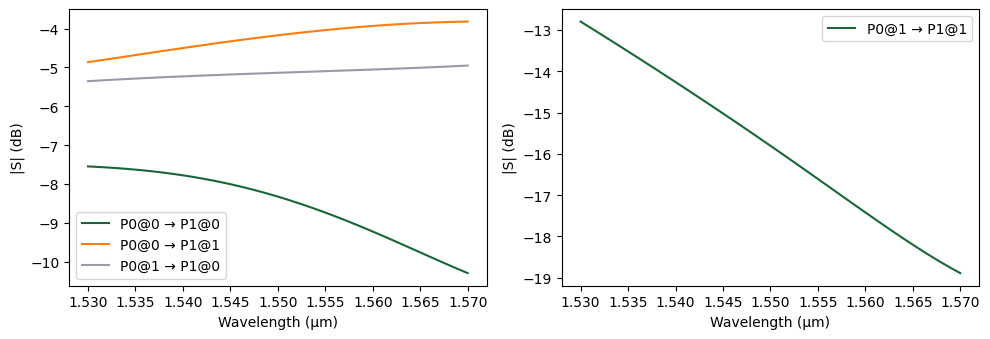

In [11]:
# hybrid_rotator = create_hybrid_rotator(gold_location="Right", gold_side=True)

s_matrix = hybrid_rotator.s_matrix(freqs, model_kwargs={})
fig, ax = pf.plot_s_matrix(s_matrix, y="dB", input_ports=["P0"], output_ports=["P1"])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

s00 = s_matrix[("P0@0", "P1@0")]
s01 = s_matrix[("P0@0", "P1@1")]
s10 = s_matrix[("P0@1", "P1@0")]
s11 = s_matrix[("P0@1", "P1@1")]

axs[0].plot(wavelengths, 10*np.log10(np.abs(s00)**2), label="P0@0 -> P1@0")
axs[0].plot(wavelengths, 10*np.log10(np.abs(s01)**2), label="P0@0 -> P1@1")
axs[0].plot(wavelengths, 10*np.log10(np.abs(s10)**2), label="P0@1 -> P1@0")
axs[0].plot(wavelengths, 10*np.log10(np.abs(s11)**2), label="P0@1 -> P1@1")
axs[0].set_xlabel("Wavelength (um)")
axs[0].legend()

s00_inv = s_matrix[("P1@0", "P0@0")]
s01_inv = s_matrix[("P1@0", "P0@1")]
s10_inv = s_matrix[("P1@1", "P0@0")]
s11_inv = s_matrix[("P1@1", "P0@1")]

axs[1].plot(wavelengths, 10*np.log10(np.abs(s00_inv)**2), label="P1@0 -> P0@0")
axs[1].plot(wavelengths, 10*np.log10(np.abs(s01_inv)**2), label="P1@0 -> P0@1")
axs[1].plot(wavelengths, 10*np.log10(np.abs(s10_inv)**2), label="P1@1 -> P0@0")
axs[1].plot(wavelengths, 10*np.log10(np.abs(s11_inv)**2), label="P1@1 -> P0@1")
axs[1].set_xlabel("Wavelength (um)")
axs[1].legend()

plt.show()
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

s00 = s_matrix[("P0@0", "P1@0")]
s01 = s_matrix[("P0@0", "P1@1")]
s10 = s_matrix[("P0@1", "P1@0")]
s11 = s_matrix[("P0@1", "P1@1")]

axs[0].plot(wavelengths, np.angle(s00), label="P0@0 -> P1@0")
axs[0].plot(wavelengths, np.angle(s01), label="P0@0 -> P1@1")
axs[0].plot(wavelengths, np.angle(s10), label="P0@1 -> P1@0")
axs[0].plot(wavelengths, np.angle(s11), label="P0@1 -> P1@1")
axs[0].set_xlabel("Wavelength (um)")
axs[0].legend()

s00_inv = s_matrix[("P1@0", "P0@0")]
s01_inv = s_matrix[("P1@0", "P0@1")]
s10_inv = s_matrix[("P1@1", "P0@0")]
s11_inv = s_matrix[("P1@1", "P0@1")]

axs[1].plot(wavelengths, np.angle(s00_inv), label="P1@0 -> P0@0")
axs[1].plot(wavelengths, np.angle(s01_inv), label="P1@0 -> P0@1")
axs[1].plot(wavelengths, np.angle(s10_inv), label="P1@1 -> P0@0")
axs[1].plot(wavelengths, np.angle(s11_inv), label="P1@1 -> P0@1")
axs[1].set_xlabel("Wavelength (um)")
axs[1].legend()

plt.show()
plt.tight_layout()

In [ ]:
sim_data = hybrid_rotator.active_model.batch_data_for(hybrid_rotator)
_ = sim_data["P0@0"].plot_field("field", "Ex", val="abs^2", robust=False)
_ = sim_data["P0@0"].plot_field("field", "Ey", val="abs^2", robust=False)
_ = sim_data["P0@0"].plot_field("field", "Ez", val="abs^2", robust=False)

In [ ]:
@pf.parametric_component
def rotator_test(extra_length=0.25):
    rotator = create_hybrid_rotator(wg_length=5.0)
    straight = pf.parametric.straight(length=extra_length, port_spec="TE-TM_1550_500")

    component = pf.Component("rotator_test")

    str_ref = component.add_reference(straight)
    rot_ref = component.add_reference(rotator)

    str_ref.connect("P0", rot_ref["P1"])

    component.add_port(component.detect_ports(["TE-TM_1550_500"], on_boundary="x"))
    component.add_model(pf.CircuitModel(), "CircuitModel")
    return component
viewer(rotator_test(extra_length=0.5))

In [ ]:
s_matrix = rotator_test(extra_length=2.5).s_matrix(freqs, model_kwargs={})
pf.plot_s_matrix(s_matrix, input_ports=["P0"], output_ports=["P1"], y="phase")

In [ ]:
lengths = np.linspace(0.1, 5.0, 100)
phase = np.zeros((lengths.size, 2))
delta_phase = np.zeros((lengths.size))
k = len(wavelengths) // 2  # Look at central wavelength

fig, axs = plt.subplots(2)

for i, l in enumerate(lengths):
    s_matrix = rotator_test(extra_length=l).s_matrix(freqs, model_kwargs={})
    phase[i, 0] = np.angle(s_matrix[("P0@0", "P1@0")][k])
    phase[i, 1] = np.angle(s_matrix[("P0@0", "P1@1")][k])
    delta_phase[i] = np.abs(phase[i, 1] - phase[i, 0])

# Plot results
axs[0].plot(lengths, phase)
axs[0].set_xlabel("Extra lengths (um)")
axs[0].set_ylabel("Phase (degrees)")
axs[0].legend(["∠TE", "∠TM"])

axs[1].plot(lengths, delta_phase)
axs[1].set_xlabel("Extra lengths (um)")
axs[1].set_ylabel("Δ Phase (degrees)")

plt.tight_layout()
plt.show()

In [ ]:
# print all lengths with delta = 0
for i, d in enumerate(delta_phase):
    print(f"Length: {lengths[i]:.3f} um, Δ Phase: {d:.6f} degrees")

In [ ]:
@pf.parametric_component
def create_hybrid_rotator_circuit(extra_top=0.0, extra_bottom=0.0):
    component = pf.Component("component")

    rotator_45 = create_hybrid_rotator(gold_location="Left")
    rotator_n45 = create_hybrid_rotator(gold_location="Right")
    straight = pf.parametric.straight(length=5.0, port_spec="TE_1550_500")
    extra_top = pf.parametric.straight(length=extra_top, port_spec="TE-TM_1550_500")
    extra_bottom = pf.parametric.straight(length=extra_bottom, port_spec="TE-TM_1550_500")
    y_branch = siepic.component("ebeam_y_1550")

    str1_ref = component.add_reference(straight)
    rot1_ref = component.add_reference(rotator_45)
    rot2_ref = component.add_reference(rotator_n45)
    yb1_ref = component.add_reference(y_branch)
    extra_top_ref = component.add_reference(extra_top)
    extra_bottom_ref = component.add_reference(extra_bottom)

    yb1_ref.connect("P0", str1_ref["P1"])
    rot1_ref.connect("P0", yb1_ref["P1"])
    rot2_ref.connect("P0", yb1_ref["P2"])
    extra_top_ref.connect("P0", rot1_ref["P1"])
    extra_bottom_ref.connect("P0", rot2_ref["P1"])

    component.add_port(
        pf.Port(center=(str1_ref.x_min, str1_ref.y_mid), input_direction=0, spec=siepic_tech.ports["TE_1550_500"])
    )

    component.add_port(
        pf.Port(center=(extra_top_ref.x_max, extra_top_ref.y_mid), input_direction=180, spec=siepic_tech.ports["TE-TM_1550_500"])
    )

    component.add_port(
        pf.Port(center=(extra_bottom_ref.x_max, extra_bottom_ref.y_mid), input_direction=180, spec=siepic_tech.ports["TE-TM_1550_500"])
    )
    
    component.add_model(pf.CircuitModel(), "CircuitModel")

    return component

component = create_hybrid_rotator_circuit(extra_top=2.5, extra_bottom=2.5)
viewer(component)

In [ ]:
s_matrix = component.s_matrix(freqs, model_kwargs={"inputs": ["P0@0"]})
fig, ax = pf.plot_s_matrix(s_matrix, input_ports=["P0"], output_ports=["P1", "P2"], y="phase")

In [ ]:
component = create_hybrid_rotator_circuit(extra_top=10, extra_bottom=10)
s_matrix = component.s_matrix(freqs, model_kwargs={"inputs": ["P0@0"]})

s010 = s_matrix[("P0@0", "P1@0")]
s011 = s_matrix[("P0@0", "P1@1")]
s020 = s_matrix[("P0@0", "P2@0")]
s021 = s_matrix[("P0@0", "P2@1")]

phase_p1_0 = np.angle(s010)
phase_p1_1 = np.angle(s011)
phase_p2_0 = np.angle(s020)
phase_p2_1 = np.angle(s021)

delta_phase_p1 = np.angle(s011) - np.angle(s010)
delta_phase_p2 = np.angle(s021) - np.angle(s020)

delta_p1p2_0 = phase_p1_0 - phase_p2_0
delta_p1p2_1 = phase_p1_1 - phase_p2_1
delta_p1p2 = delta_phase_p1 - delta_phase_p2

fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].plot(wavelengths, phase_p1_0, label="TE")
axs[0, 0].plot(wavelengths, phase_p1_1, label="TM")
axs[1, 0].plot(wavelengths, phase_p2_0, label="TE")
axs[1, 0].plot(wavelengths, phase_p2_1, label="TM")

axs[0, 1].plot(wavelengths, delta_phase_p1, label="Δ Phase P1")
axs[1, 1].plot(wavelengths, delta_phase_p2, label="Δ Phase P2")

axs[2, 0].plot(wavelengths, delta_p1p2_0, label="TE")
axs[2, 0].plot(wavelengths, delta_p1p2_1, label="TM")

axs[2, 1].plot(wavelengths, delta_p1p2, label="Δ Phase P1 - Δ Phase P2")

axs[0, 0].set_title("Phase P1", fontsize=10)
axs[1, 0].set_title("Phase P2", fontsize=10)
axs[0, 1].set_title("Δ Phase P1", fontsize=10)
axs[1, 1].set_title("Δ Phase P2", fontsize=10)
axs[2, 0].set_title("Phase Difference P1 - P2", fontsize=10)
axs[2, 1].set_title("Δ Phase Difference P1 - P2", fontsize=10)
axs[0, 0].legend()
axs[1, 0].legend()
axs[0, 1].legend()
axs[1, 1].legend()
axs[2, 0].legend()
axs[2, 1].legend()


plt.tight_layout()
plt.show()